In [114]:
import numpy as np
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import matplotlib as m
import matplotlib.colors 
from scipy.interpolate import make_lsq_spline, BSpline

mypath_L20                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4E/L_20/"
mypath_L40                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4E/High_Resolution_Files/L_40/"
mypath_L60                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4E/High_Resolution_Files/L_60/"
mypath_L80                  = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4E/High_Resolution_Files/L_80/"
mypath_L100                 = "/home/oline/Documents/UiO/FYS3150/FYS3150/Project_4/Py_Scripts/Results/4E/High_Resolution_Files/L_100/"

def read_files(path, number_of_files):  
    
    # N, E, M in struct [Type, Value, File]
    T_r = 348 #34
    T = np.zeros((T_r, number_of_files))
    E = np.zeros((T_r, number_of_files))
    E2 = np.zeros((T_r, number_of_files))
    M  = np.zeros((T_r, number_of_files))
    M2 = np.zeros((T_r, number_of_files))
    Abs_M = np.zeros((T_r, number_of_files))
    Chi =  np.zeros((T_r, number_of_files))
    CV =  np.zeros((T_r, number_of_files))
    
    file_counter = 0
    for filename in os.listdir(path):
        with open(path + filename, 'r') as infile:
            lines = infile.readlines()[3:]
            line_counter = 0
            for line in lines:
                line = line.split()
                T[line_counter, file_counter] = (float(line[0]))
                E[line_counter, file_counter] = (float(line[1]))
                E2[line_counter, file_counter] = (float(line[2]))
                M[line_counter, file_counter] = (float(line[3]))
                M2[line_counter, file_counter] = (float(line[4]))
                Abs_M[line_counter, file_counter] = (float(line[5]))
                Chi[line_counter, file_counter] = (float(line[6]))
                CV[line_counter, file_counter] = (float(line[7]))
                line_counter += 1
        file_counter += 1
    
    # N
    Avg_T = np.mean(T, axis = 1)
    Avg_E = np.mean(E, axis = 1)
    Avg_E2 = np.mean(E, axis = 1)
    Avg_M = np.mean(M, axis = 1)
    Avg_M2 = np.mean(M2, axis = 1)
    Avg_Abs_M = np.mean(Abs_M, axis = 1)
    Avg_Chi = np.mean(Chi, axis = 1)
    Avg_CV = np.mean(CV, axis = 1)
    
    std_T = np.std(T, axis = 1)
    std_E = np.std(E, axis = 1)
    std_E2 = np.std(E, axis = 1)
    std_M = np.std(M, axis = 1)
    std_M2 = np.std(M2, axis = 1)
    std_Abs_M = np.std(Abs_M, axis = 1)
    std_Chi = np.std(Chi, axis = 1)
    std_CV = np.std(CV, axis = 1)
    
    df = pd.DataFrame({"T": Avg_T, "E": Avg_E, "E2": Avg_E2, "M": Avg_M, "M2": Avg_M2, "Abs_M": Avg_Abs_M, "Chi": Avg_Chi, "CV": Avg_CV, "std_E": std_E, "std_E2": std_E2, "std_M": std_M, "std_M2": std_M2, "std_Abs_M": std_Abs_M, "std_Chi": std_Chi, "std_CV": std_CV})
    return df


#L20 = read_files(mypath_L20)
L40 = read_files(mypath_L40, 10)
L60 = read_files(mypath_L60, 12)
L80 = read_files(mypath_L80, 21)
L100 = read_files(mypath_L100, 20)

analytical_values = np.load('analytical_values.npy')

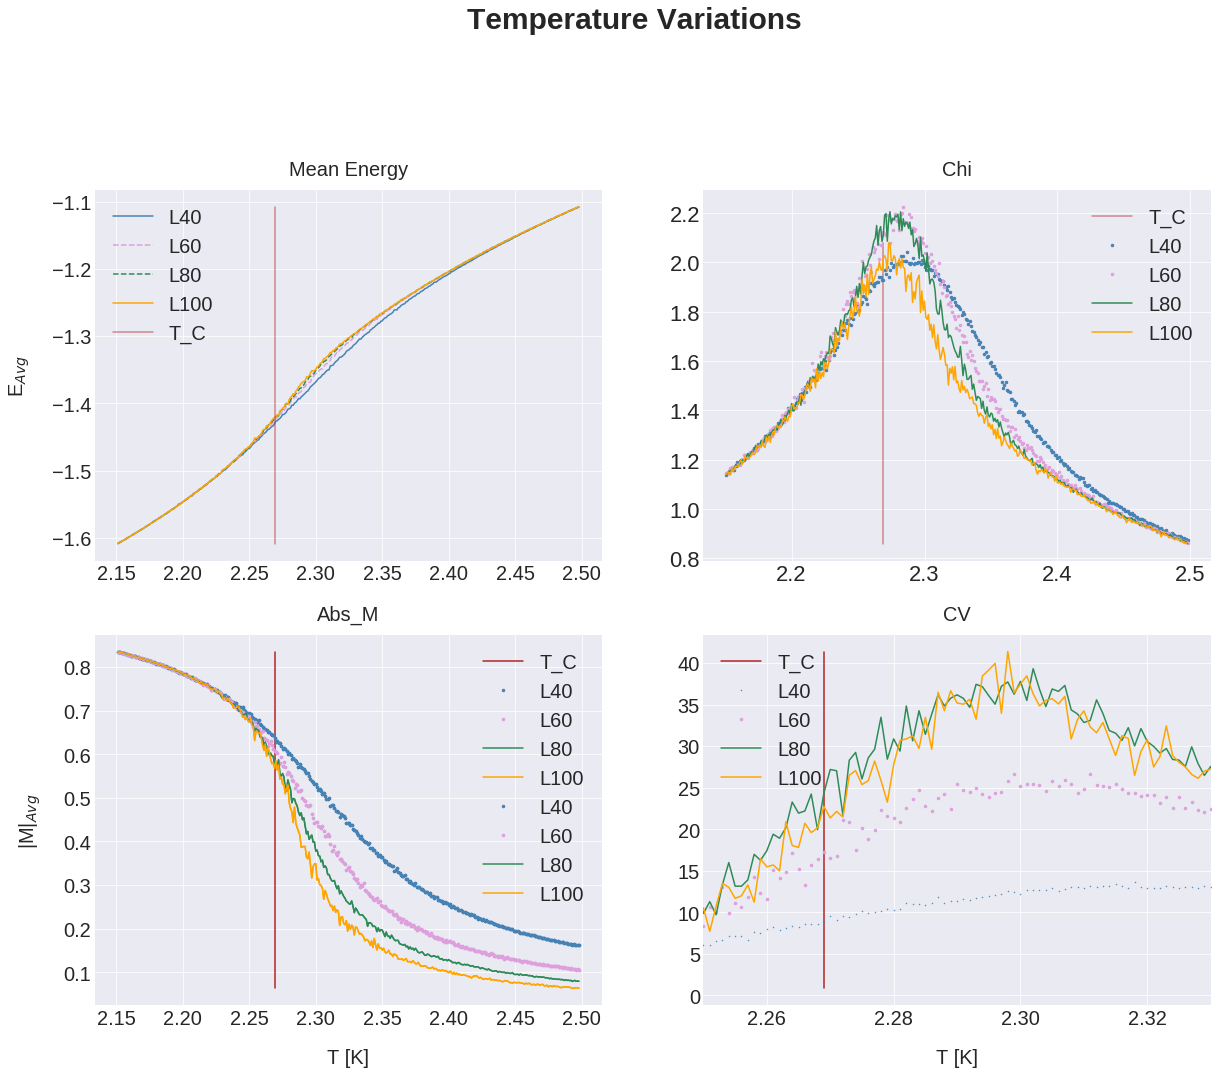

<Figure size 432x288 with 0 Axes>

In [7]:
fsize = 20
fig, axs = plt.subplots(2, 2, figsize = (20,15))
plt.style.use('seaborn-darkgrid')
fig.suptitle('Temperature Variations\n',y=1.05, fontsize=fsize +10, fontweight='bold')

c1 = 'firebrick'
c2 = 'steelblue'
c3 = 'plum'
c4 = 'seagreen'
c5 = 'orange'


axs[0, 0].set_title('Mean Energy', fontsize = fsize, pad = 15)
axs[0, 0].plot(L60['T'], L40['E'], '-', ms = 5 , label = 'L40', c = c2)
#axs[0, 0].plot(L20['T'], L20['E'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[0, 0].plot(L60['T'], L60['E'], '--', ms = 5 , label = 'L60', c = c3)
axs[0, 0].plot(L80['T'], L80['E'], '--', ms = 5 , label = 'L80', c = c4)
axs[0, 0].plot(L100['T'], L100['E'], '-', ms = 5 , label = 'L100', c = c5)
axs[0, 0].plot([2.269,2.269],[np.min(L100['E']), np.max(L100['E'])], ms = 5 , label = 'T_C', c = c1, alpha = 0.5)



axs[0, 0].legend(fontsize = fsize)

axs[1, 0].set_title('Abs_M', fontsize = fsize, pad = 15)
axs[1, 0].plot([2.269,2.269],[np.min(L100['Abs_M']), np.max(L100['Abs_M'])], ms = 5 , label = 'T_C', c = c1)

axs[1, 0].plot(L60['T'], L40['Abs_M'], '.', ms = 5 , label = 'L40', c = c2)
#axs[1, 0].plot(L20['T'], L20['Abs_M'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[1, 0].plot(L60['T'], L60['Abs_M'], '.', ms = 5 , label = 'L60', c = c3)
axs[1, 0].plot(L80['T'], L80['Abs_M'], '-', ms = 5 , label = 'L80', c = c4)
axs[1, 0].plot(L100['T'], L100['Abs_M'], '-', ms = 5 , label = 'L100', c = c5)

axs[1, 0].plot(L40['T'], L40['Abs_M'], '.', ms = 5 , label = 'L40', c = c2)
#axs[1, 0].plot(L20['T'], L20['Abs_M'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[1, 0].plot(L60['T'], L60['Abs_M'], '.', ms = 5 , label = 'L60', c = c3)
axs[1, 0].plot(L80['T'], L80['Abs_M'], '-', ms = 5 , label = 'L80', c = c4)
axs[1, 0].plot(L100['T'], L100['Abs_M'], '-', ms = 5 , label = 'L100', c = c5)

axs[1, 0].legend(loc = 'best', fontsize = fsize)

axs[0, 1].set_title('Chi', fontsize = fsize, pad = 15)
axs[0, 1].plot([2.269,2.269],[np.min(L100['Chi']), np.max(L100['Chi'])], ms = 5 , label = 'T_C', c = c1, alpha = 0.5)

#axs[0, 1].errorbar(L40['T'], L40['Chi'], L40['std_Chi'], c = c2, alpha = 0.5, linestyle = 'none')

axs[0, 1].plot(L40['T'], L40['Chi'], '.', ms = 5 , label = 'L40', c = c2)
#axs[0, 1].plot(L20['T'], L20['Chi'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[0, 1].plot(L60['T'], L60['Chi'], '.', ms = 5 , label = 'L60', c = c3)
axs[0, 1].plot(L80['T'], L80['Chi'], '-', ms = 5 , label = 'L80', c = c4)
axs[0, 1].plot(L100['T'], L100['Chi'], '-', ms = 5 , label = 'L100', c = c5)
axs[0, 1].legend(fontsize = fsize)

axs[1, 1].set_title('CV', fontsize = fsize, pad = 15)
axs[1, 1].plot([2.269,2.269],[np.min(L100['CV']), np.max(L100['CV'])], ms = 5 , label = 'T_C', c = c1)
axs[1, 1].plot(L40['T'], L40['CV'], '.', ms = 1 , label = 'L40', c = c2)
#axs[1, 1].plot(L20['T'], L20['CV'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[1, 1].plot(L60['T'], L60['CV'], '.', ms = 5 , label = 'L60', c = c3)
axs[1, 1].plot(L80['T'], L80['CV'], '-', ms = 5 , label = 'L80', c = c4)
axs[1, 1].plot(L100['T'], L100['CV'], '-', ms = 5 , label = 'L100', c = c5)
axs[1, 1].legend(loc = 'best', fontsize = fsize)


axs[1, 0].set_xlabel('T [K]', fontsize = fsize, labelpad = 20)
axs[1, 1].set_xlabel('T [K]', fontsize = fsize, labelpad = 20)
axs[0, 0].set_ylabel('E$_{Avg}$', fontsize = fsize, labelpad = 20)
axs[1, 0].set_ylabel('|M|$_{Avg}$', fontsize = fsize, labelpad = 20)

axs[0, 0].tick_params(labelsize=fsize)
axs[1, 0].tick_params(labelsize=fsize)
axs[1, 1].tick_params(labelsize=fsize)
axs[0, 1].tick_params(labelsize=22)

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
 #   ax.label_outer()

plt.xlim([2.25,2.33])
plt.show()
plt.savefig('Plot4.png', bbox_inches='tight')

In [8]:
print(L40['T'][np.argmax(L40['Chi'])])
print(L60['T'][np.argmax(L60['Chi'])])
print(L80['T'][np.argmax(L80['Chi'])])
print(L100['T'][np.argmax(L100['Chi'])])

2.287
2.2839999999999994
2.274
2.2730000000000006


/home/oline/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


In [9]:
from scipy.signal import savgol_filter
yhat = savgol_filter(L80['CV'], len(L80['CV'])-1,7) 

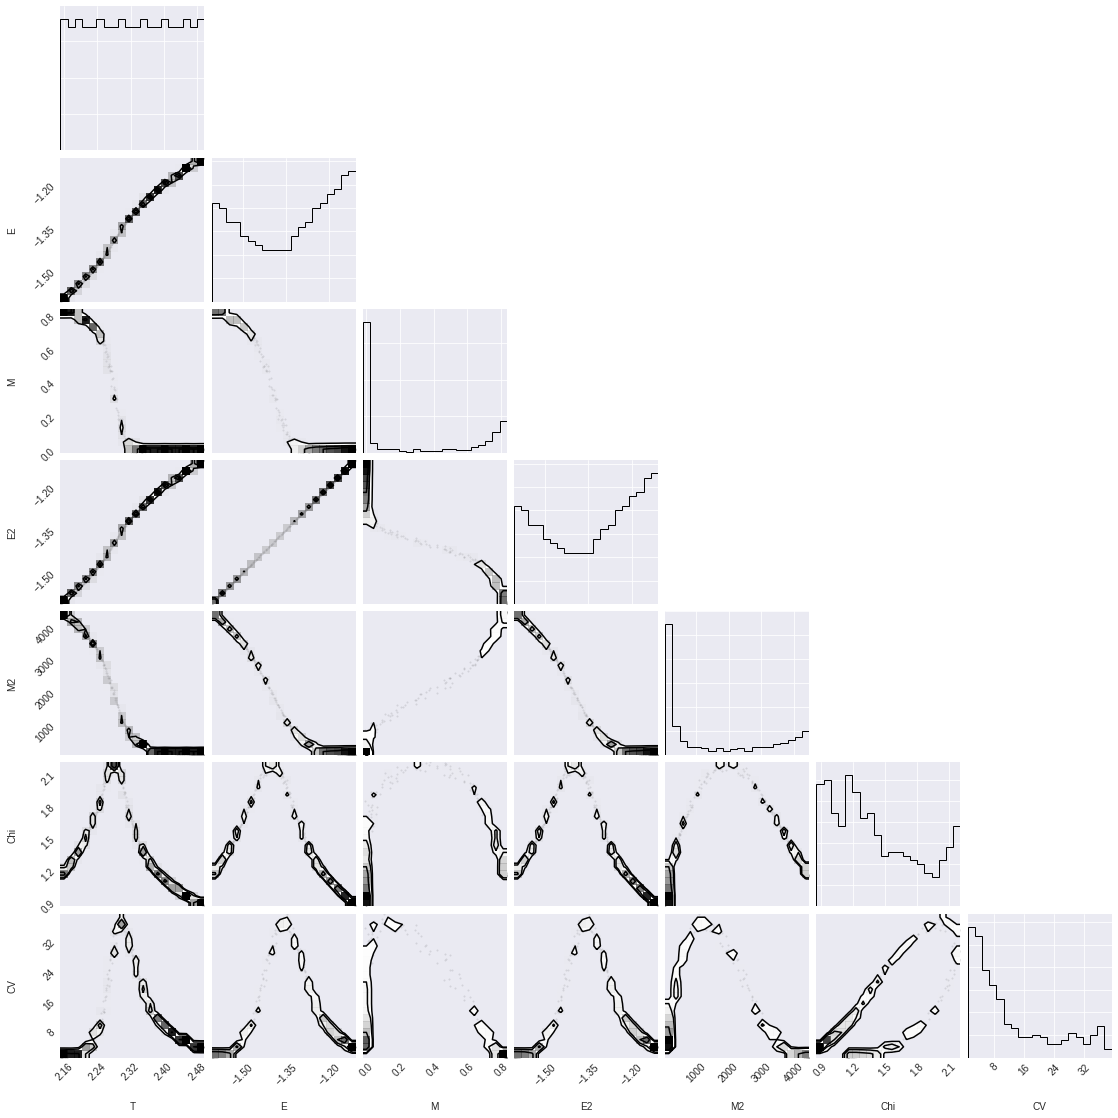

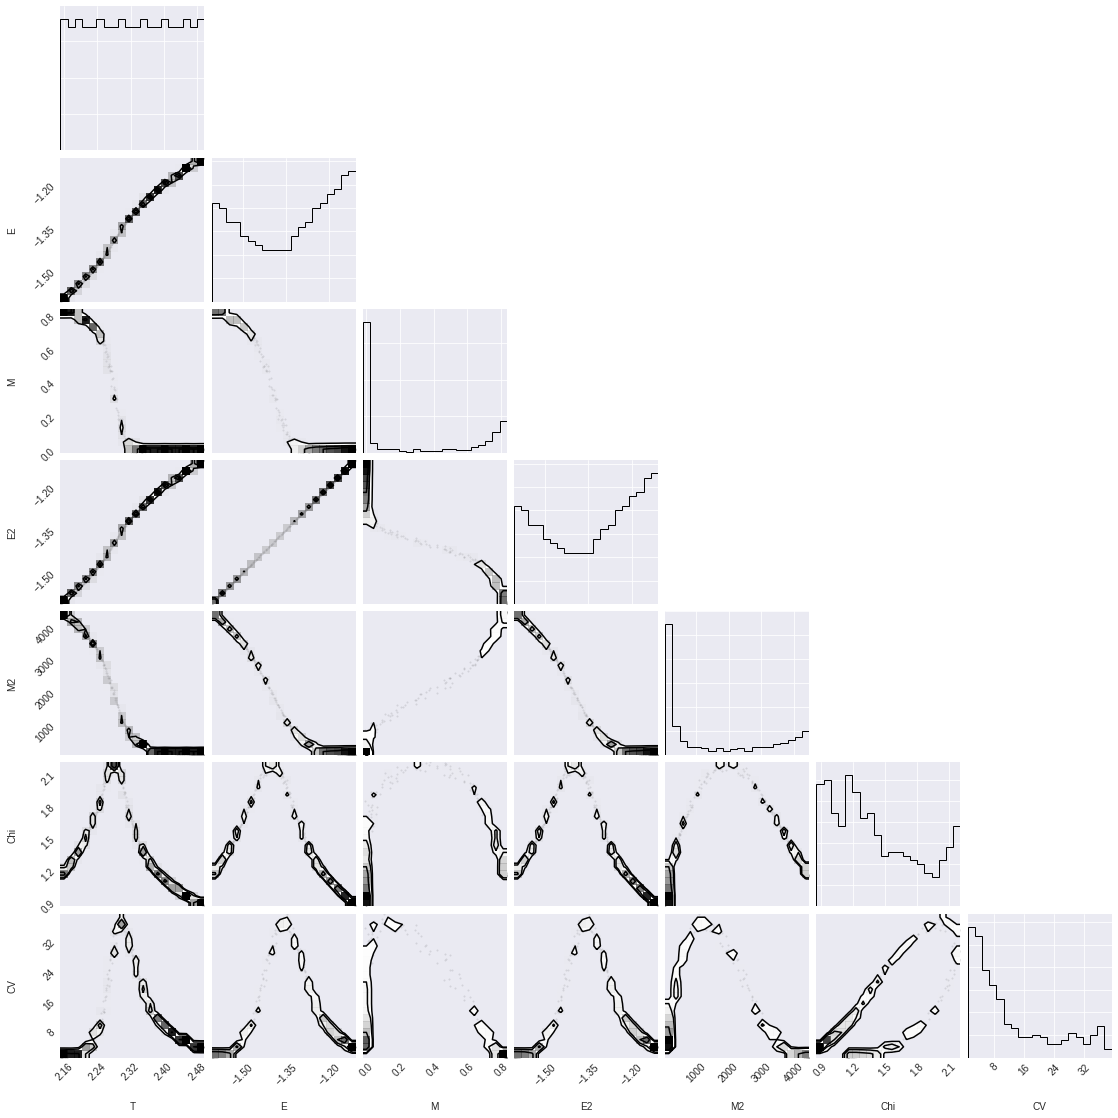

In [11]:
import corner

corner.corner(L80[['T', 'E', 'M', 'E2', 'M2','Chi', 'CV']])

In [123]:
def make_splinte(x, y, k):
    t = np.array([x[int(len(x)/2-10)], x[int(len(x)/2)],  x[int(len(x)/2+10)]])
    t = np.r_[(x[0],)*(k+1),
           t,
           (x[-1],)*(k+1)]
    spl = make_lsq_spline(x, y, t, k)
    xs = np.linspace(np.min(x), np.max(x), len(x))
    
    return spl, xs

spl40, x40 = make_splinte( L40['T'].values, L40['Chi'].values, 15)
spl60, x60 = make_splinte( L60['T'].values, L60['Chi'].values, 15)
spl80, x80 = make_splinte( L80['T'].values, L80['Chi'].values, 15)
spl100, x100 = make_splinte( L100['T'].values, L100['Chi'].values, 15)

spl40_2, x40_2 = make_splinte( L40['T'].values, L40['CV'].values, 15)
spl60_2, x60_2 = make_splinte( L60['T'].values, L60['CV'].values, 15)
spl80_2, x80_2 = make_splinte( L80['T'].values, L80['CV'].values, 15)
spl100_2, x100_2 = make_splinte( L100['T'].values, L100['CV'].values, 15)

In [152]:
print(round(L100['T'][np.argmax(spl100(L100['T']))],3))
print(round(L80['T'][np.argmax(spl80(L80['T']))],3))
print(round(L60['T'][np.argmax(spl60(L60['T']))],3))
print(round(L40['T'][np.argmax(spl40(L40['T']))],3))
print('----------')
print(round(L100['T'][np.argmax(spl100_2(L100['T']))],3))
print(round(L80['T'][np.argmax(spl80_2(L80['T']))],3))
print(round(L60['T'][np.argmax(spl60_2(L60['T']))],3))
print(round(L40['T'][np.argmax(spl40_2(L40['T']))],3))

#print(spl100(L100['T']))

2.274
2.279
2.282
2.289
----------
2.299
2.298
2.304
2.32


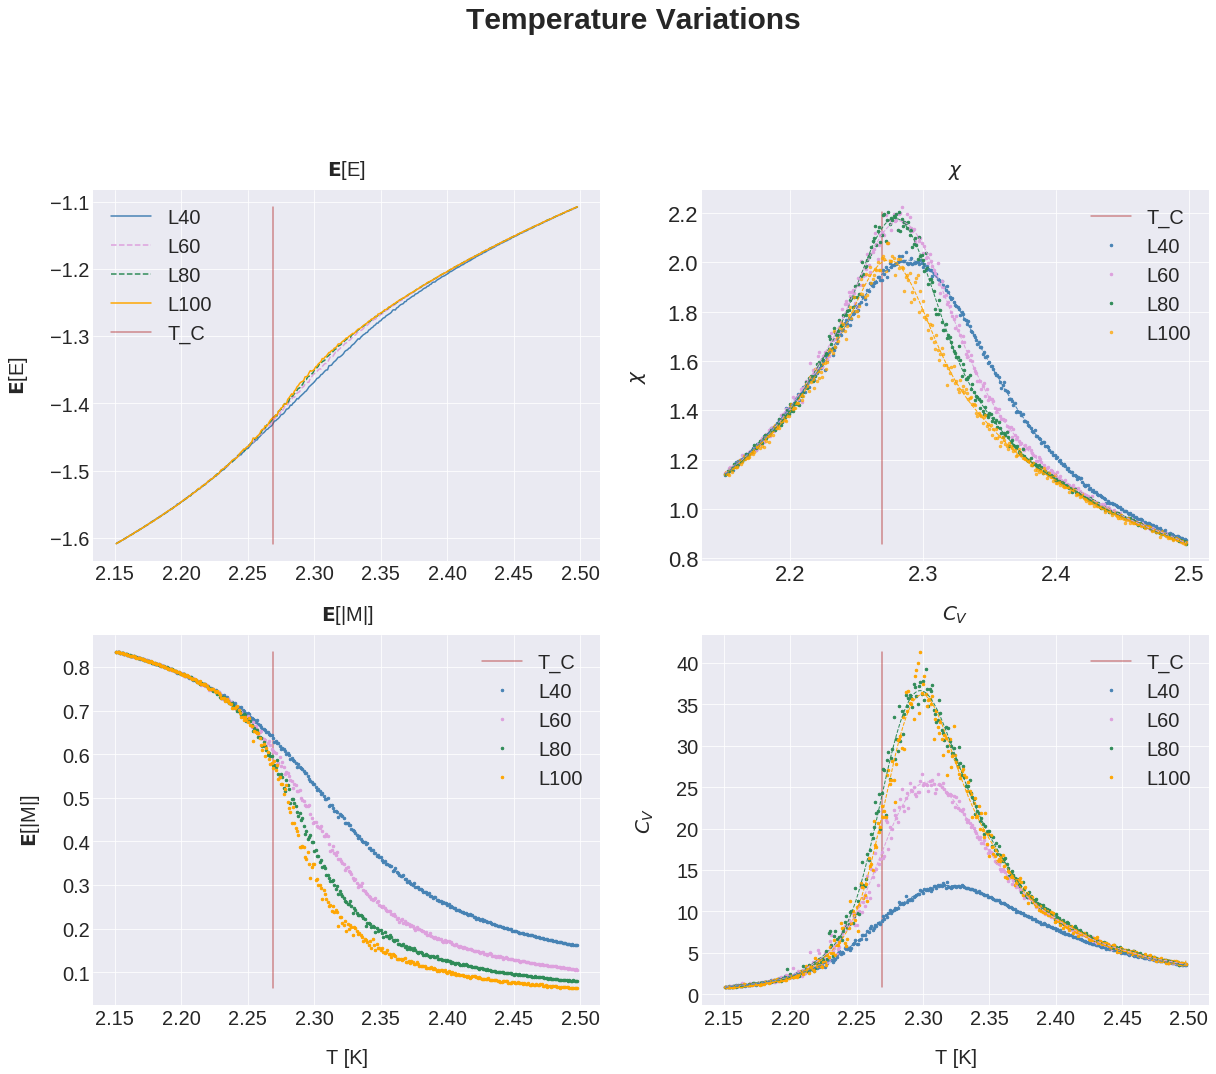

<Figure size 432x288 with 0 Axes>

In [166]:
fsize = 20
fig, axs = plt.subplots(2, 2, figsize = (20,15))
plt.style.use('seaborn-darkgrid')
fig.suptitle('Temperature Variations\n',y=1.05, fontsize=fsize +10, fontweight='bold')

c1 = 'firebrick'
c2 = 'steelblue'
c3 = 'plum'
c4 = 'seagreen'
c5 = 'orange'


axs[0, 0].set_title('$\mathbf{E}$[E]', fontsize = fsize, pad = 15)
axs[0, 0].plot(L60['T'], L40['E'], '-', ms = 5 , label = 'L40', c = c2)
#axs[0, 0].plot(L20['T'], L20['E'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[0, 0].plot(L60['T'], L60['E'], '--', ms = 5 , label = 'L60', c = c3)
axs[0, 0].plot(L80['T'], L80['E'], '--', ms = 5 , label = 'L80', c = c4)
axs[0, 0].plot(L100['T'], L100['E'], '-', ms = 5 , label = 'L100', c = c5)
axs[0, 0].plot([2.269,2.269],[np.min(L100['E']), np.max(L100['E'])], ms = 5 , label = 'T_C', c = c1, alpha = 0.5)
#axs[0, 0].set_xlim([2.269-0.01,2.269+0.1])


axs[0, 0].legend(fontsize = fsize)

axs[1, 0].set_title('$\mathbf{E}$[|M|]', fontsize = fsize, pad = 15)
axs[1, 0].plot([2.269,2.269],[np.min(L100['Abs_M']), np.max(L100['Abs_M'])], ms = 5 , label = 'T_C', c = c1, alpha  = 0.5)

axs[1, 0].plot(L60['T'], L40['Abs_M'], '.', ms = 5 , label = 'L40', c = c2)
#axs[1, 0].plot(L20['T'], L20['Abs_M'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[1, 0].plot(L60['T'], L60['Abs_M'], '.', ms = 5 , label = 'L60', c = c3)
axs[1, 0].plot(L80['T'], L80['Abs_M'], '.', ms = 5 , label = 'L80', c = c4)
axs[1, 0].plot(L100['T'], L100['Abs_M'], '.', ms = 5 , label = 'L100', c = c5)

#axs[1, 0].set_xlim([2.269-0.01,2.269+0.1])
axs[1, 0].legend(loc = 'best', fontsize = fsize)

axs[0, 1].set_title('$\chi$', fontsize = fsize, pad = 15)
axs[0, 1].plot([2.269,2.269],[np.min(L100['Chi']), np.max(L80['Chi'])], ms = 5 , label = 'T_C', c = c1, alpha = 0.5)

#axs[0, 1].errorbar(L40['T'], L40['Chi'], L40['std_Chi'], c = c2, alpha = 0.5, linestyle = 'none')

axs[0, 1].plot(L40['T'], L40['Chi'], '.', ms = 5 , label = 'L40', c = c2)
#axs[0, 1].plot(L20['T'], L20['Chi'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[0, 1].plot(L60['T'], L60['Chi'], '.', ms = 5 , label = 'L60', c = c3)
axs[0, 1].plot(L80['T'], L80['Chi'], '.', ms = 5 , label = 'L80', c = c4)
axs[0, 1].plot(L100['T'], L100['Chi'], '.', ms = 5 , label = 'L100', c = c5, alpha = 0.7)
axs[0, 1].legend(fontsize = fsize)
axs[0, 1].plot(x100, spl100(x), '--', lw=1, ms = 1, label='LSQ spline', c = c5)
axs[0, 1].plot(x80, spl80(x), '--', lw=1, ms = 1, label='LSQ spline', c = c4)
axs[0, 1].plot(x60, spl60(x), '--', lw=1, ms = 1, label='LSQ spline', c = c3)
axs[0, 1].plot(x40, spl40(x), '--', lw=1, ms = 1, label='LSQ spline', c = c2)
#axs[0, 1].set_xlim([2.269-0.01,2.269+0.1])

axs[1, 1].set_title('$C_V$', fontsize = fsize, pad = 15)
axs[1, 1].plot([2.269,2.269],[np.min(L100['CV']), np.max(L100['CV'])], ms = 5 , label = 'T_C', c = c1, alpha  = 0.5)
axs[1, 1].plot(L40['T'], L40['CV'], '.', ms = 5 , label = 'L40', c = c2)
#axs[1, 1].plot(L20['T'], L20['CV'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[1, 1].plot(L60['T'], L60['CV'], '.', ms = 5 , label = 'L60', c = c3)
axs[1, 1].plot(L80['T'], L80['CV'], '.', ms = 5 , label = 'L80', c = c4)
axs[1, 1].plot(L100['T'], L100['CV'], '.', ms = 5 , label = 'L100', c = c5)
axs[1, 1].legend(loc = 'best', fontsize = fsize)


axs[1, 1].plot(x100_2, spl100_2(x), '--', lw=1, ms = 1, c = c5)
axs[1, 1].plot(x80_2, spl80_2(x), '--', lw=1, ms = 1, c = c4)
axs[1, 1].plot(x60_2, spl60_2(x), '--', lw=1, ms = 1, c = c3)
axs[1, 1].plot(x40_2, spl40_2(x), '--', lw=1, ms = 1, c = c2)
#axs[1, 1].set_xlim([2.269-0.01,2.269+0.1])

axs[1, 0].set_xlabel('T [K]', fontsize = fsize, labelpad = 20)
axs[1, 1].set_xlabel('T [K]', fontsize = fsize, labelpad = 20)
axs[0, 0].set_ylabel('$\mathbf{E}$[E]', fontsize = fsize, labelpad = 20)
axs[1, 0].set_ylabel('$\mathbf{E}$[|M|]', fontsize = fsize, labelpad = 20)
axs[0, 1].set_ylabel('$\chi$', fontsize = fsize, labelpad = 20)
axs[1, 1].set_ylabel('$C_V$', fontsize = fsize, labelpad = 20)

axs[0, 0].tick_params(labelsize=fsize)
axs[1, 0].tick_params(labelsize=fsize)
axs[1, 1].tick_params(labelsize=fsize)
axs[0, 1].tick_params(labelsize=22)

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
 #   ax.label_outer()

#plt.xlim([2.25,2.33])
plt.show()
plt.savefig('Plot4.png', bbox_inches='tight')

# optimize selection of knots

You could run a itterative procedure, calculate the standard deviation as a function of k and thereafter select k 

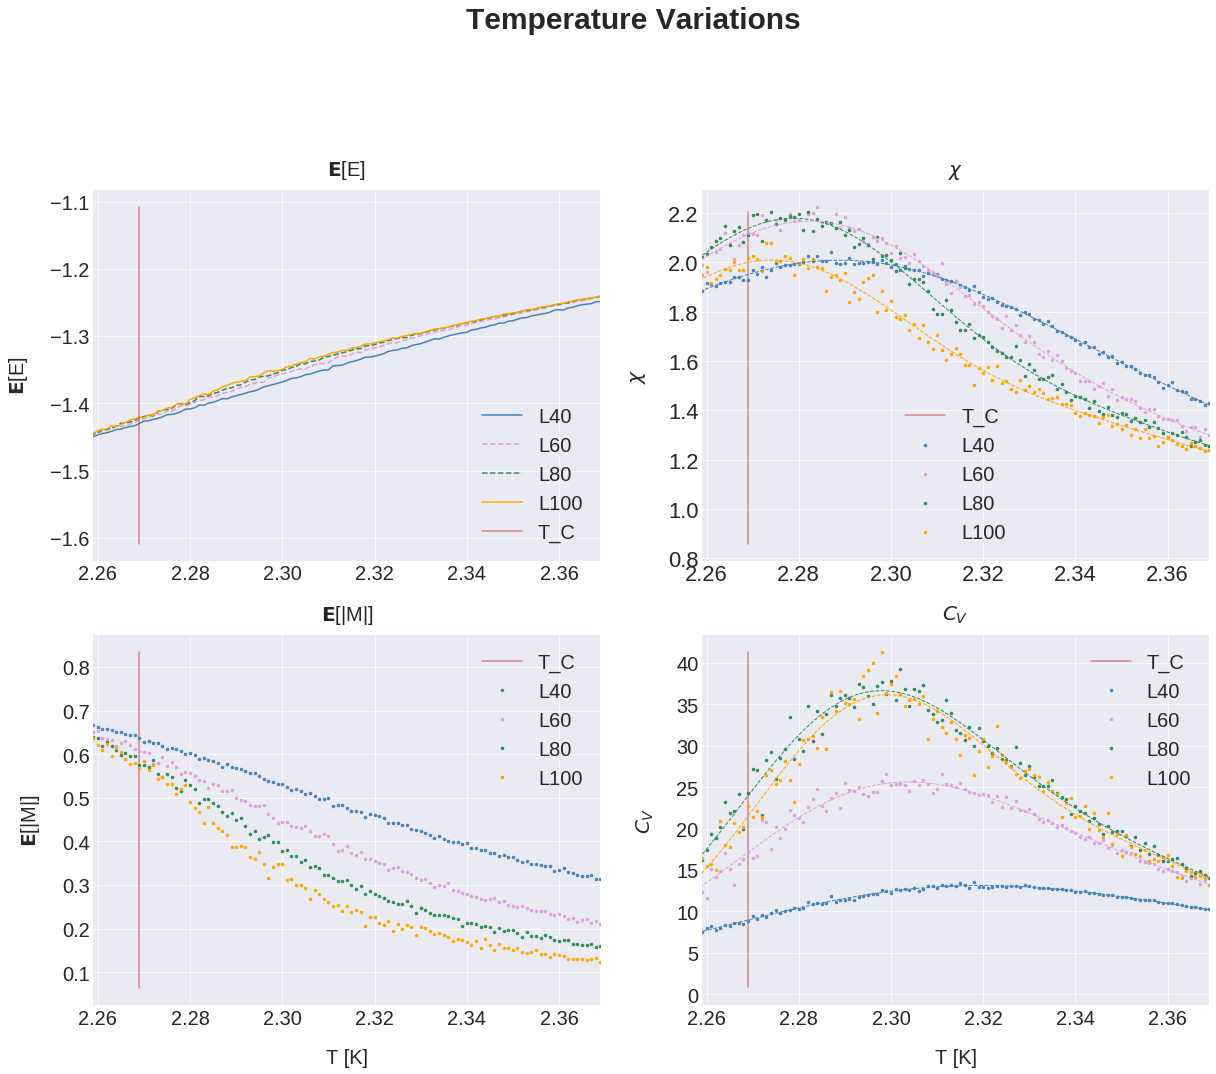

<Figure size 432x288 with 0 Axes>

In [165]:
fsize = 20
fig, axs = plt.subplots(2, 2, figsize = (20,15))
plt.style.use('seaborn-darkgrid')
fig.suptitle('Temperature Variations\n',y=1.05, fontsize=fsize +10, fontweight='bold')

c1 = 'firebrick'
c2 = 'steelblue'
c3 = 'plum'
c4 = 'seagreen'
c5 = 'orange'


axs[0, 0].set_title('$\mathbf{E}$[E]', fontsize = fsize, pad = 15)
axs[0, 0].plot(L60['T'], L40['E'], '-', ms = 5 , label = 'L40', c = c2)
#axs[0, 0].plot(L20['T'], L20['E'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[0, 0].plot(L60['T'], L60['E'], '--', ms = 5 , label = 'L60', c = c3)
axs[0, 0].plot(L80['T'], L80['E'], '--', ms = 5 , label = 'L80', c = c4)
axs[0, 0].plot(L100['T'], L100['E'], '-', ms = 5 , label = 'L100', c = c5)
axs[0, 0].plot([2.269,2.269],[np.min(L100['E']), np.max(L100['E'])], ms = 5 , label = 'T_C', c = c1, alpha = 0.5)
axs[0, 0].set_xlim([2.269-0.01,2.269+0.1])


axs[0, 0].legend(fontsize = fsize)

axs[1, 0].set_title('$\mathbf{E}$[|M|]', fontsize = fsize, pad = 15)
axs[1, 0].plot([2.269,2.269],[np.min(L100['Abs_M']), np.max(L100['Abs_M'])], ms = 5 , label = 'T_C', c = c1,alpha  = 0.5)

axs[1, 0].plot(L60['T'], L40['Abs_M'], '.', ms = 5 , label = 'L40', c = c2)
#axs[1, 0].plot(L20['T'], L20['Abs_M'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[1, 0].plot(L60['T'], L60['Abs_M'], '.', ms = 5 , label = 'L60', c = c3)
axs[1, 0].plot(L80['T'], L80['Abs_M'], '.', ms = 5 , label = 'L80', c = c4)
axs[1, 0].plot(L100['T'], L100['Abs_M'], '.', ms = 5 , label = 'L100', c = c5)

axs[1, 0].set_xlim([2.269-0.01,2.269+0.1])
axs[1, 0].legend(loc = 'best', fontsize = fsize)

axs[0, 1].set_title('$\chi$', fontsize = fsize, pad = 15)
axs[0, 1].plot([2.269,2.269],[np.min(L100['Chi']), np.max(L80['Chi'])], ms = 5 , label = 'T_C', c = c1, alpha = 0.5)

#axs[0, 1].errorbar(L40['T'], L40['Chi'], L40['std_Chi'], c = c2, alpha = 0.5, linestyle = 'none')

axs[0, 1].plot(L40['T'], L40['Chi'], '.', ms = 5 , label = 'L40', c = c2)
#axs[0, 1].plot(L20['T'], L20['Chi'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[0, 1].plot(L60['T'], L60['Chi'], '.', ms = 5 , label = 'L60', c = c3)
axs[0, 1].plot(L80['T'], L80['Chi'], '.', ms = 5 , label = 'L80', c = c4)
axs[0, 1].plot(L100['T'], L100['Chi'], '.', ms = 5 , label = 'L100', c = c5,)
axs[0, 1].legend(fontsize = fsize)
axs[0, 1].plot(x100, spl100(x), '--', lw=1, ms = 1, label='LSQ spline', c = c5)
axs[0, 1].plot(x80, spl80(x), '--', lw=1, ms = 1, label='LSQ spline', c = c4)
axs[0, 1].plot(x60, spl60(x), '--', lw=1, ms = 1, label='LSQ spline', c = c3)
axs[0, 1].plot(x40, spl40(x), '--', lw=1, ms = 1, label='LSQ spline', c = c2)
axs[0, 1].set_xlim([2.269-0.01,2.269+0.1])

axs[1, 1].set_title('$C_V$', fontsize = fsize, pad = 15)
axs[1, 1].plot([2.269,2.269],[np.min(L100['CV']), np.max(L100['CV'])], ms = 5 , label = 'T_C', c = c1, alpha  = 0.5)
axs[1, 1].plot(L40['T'], L40['CV'], '.', ms = 5 , label = 'L40', c = c2)
#axs[1, 1].plot(L20['T'], L20['CV'], '--', ms = 5 , label = 'L20', c = 'plum')
axs[1, 1].plot(L60['T'], L60['CV'], '.', ms = 5 , label = 'L60', c = c3)
axs[1, 1].plot(L80['T'], L80['CV'], '.', ms = 5 , label = 'L80', c = c4)
axs[1, 1].plot(L100['T'], L100['CV'], '.', ms = 5 , label = 'L100', c = c5)
axs[1, 1].legend(loc = 'best', fontsize = fsize)


axs[1, 1].plot(x100_2, spl100_2(x), '--', lw=1, ms = 1, label='LSQ spline', c = c5)
axs[1, 1].plot(x80_2, spl80_2(x), '--', lw=1, ms = 1, label='LSQ spline', c = c4)
axs[1, 1].plot(x60_2, spl60_2(x), '--', lw=1, ms = 1, label='LSQ spline', c = c3)
axs[1, 1].plot(x40_2, spl40_2(x), '--', lw=1, ms = 1, label='LSQ spline', c = c2)
axs[1, 1].set_xlim([2.269-0.01,2.269+0.1])

axs[1, 0].set_xlabel('T [K]', fontsize = fsize, labelpad = 20)
axs[1, 1].set_xlabel('T [K]', fontsize = fsize, labelpad = 20)
axs[0, 0].set_ylabel('$\mathbf{E}$[E]', fontsize = fsize, labelpad = 20)
axs[1, 0].set_ylabel('$\mathbf{E}$[|M|]', fontsize = fsize, labelpad = 20)
axs[0, 1].set_ylabel('$\chi$', fontsize = fsize, labelpad = 20)
axs[1, 1].set_ylabel('$C_V$', fontsize = fsize, labelpad = 20)

axs[0, 0].tick_params(labelsize=fsize)
axs[1, 0].tick_params(labelsize=fsize)
axs[1, 1].tick_params(labelsize=fsize)
axs[0, 1].tick_params(labelsize=22)

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
 #   ax.label_outer()

#plt.xlim([2.25,2.33])
plt.show()
plt.savefig('Plot5.png', bbox_inches='tight')

In [167]:
l1 = round(L100['T'][np.argmax(spl100(L100['T']))],3)
l2 = round(L80['T'][np.argmax(spl80(L80['T']))],3)
l3 = round(L60['T'][np.argmax(spl60(L60['T']))],3)
l4 = round(L40['T'][np.argmax(spl40(L40['T']))],3)
c1 = round(L100['T'][np.argmax(spl100_2(L100['T']))],3)
c2 = round(L80['T'][np.argmax(spl80_2(L80['T']))],3)
c3 = round(L60['T'][np.argmax(spl60_2(L60['T']))],3)
c4 = round(L40['T'][np.argmax(spl40_2(L40['T']))],3)


In [183]:
a = (l1-l2)/(1/100-1/80)
print(a)

1.999999999999957


In [182]:
l1 + a*1/100

2.2939999999999996

In [184]:
(2.269-2.294)/2.269

-0.011018069634200049

In [185]:
a = (c1-c2)/(1/100-1/80)
print(a)

-0.3999999999999559


In [190]:
rel = c1 + a*1/100

2.2950000000000004

In [191]:
(2.295-2.269)/2.269

0.011458792419568002